###### Pymaceuticals Inc.
---

### Analysis

Overall test is inconclusive. The design of the study is not effective. More reasearch and testing is required.

Observation 1
The drug regemins were not evenly distributed. The Capomulin was tested on 230 mice and Propriva was tested 161, with the remaining regimens falling somewhere in between. This variation will not prodcue reliable results.

Observation 2
The analysis below does not compare tumor volume on day 1 against day 45. Had the analysis done this, it would be have been easier to determine whether the drug regimens effectiveness.

Observation 3
Mouse b128 is a 9 month female that was given Capomulin to treat her tumor. When her treatment started the tumor volume was nearly 46 mm. Over the course of 35 days the tumor's volume shrinked to roughly 38 mm. However the volume started to increase. It's unclear if the Capomulin regimen stopped, or what other factors have to caused the tumor volume to increase. While Capomulin does appear promising, additional information and testing would be required.


 

In [131]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
new_dataset_df = pd.merge(study_results, mouse_metadata, how="outer", on="Mouse ID")

# Display the data table for preview
new_dataset_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
new_dataset_df["Mouse ID"].value_counts()

g989    13
b128    10
q787    10
s337    10
q511    10
        ..
f932     1
b447     1
u153     1
t573     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_df = new_dataset_df.loc[new_dataset_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
dup_mice_df

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
G989_df = new_dataset_df.loc[new_dataset_df["Mouse ID"] == "g989"]
G989_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [16]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = new_dataset_df.drop_duplicates("Mouse ID")
clean_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame
num_mice = clean_df.drop(clean_df.index[0])

len(num_mice)

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 


mean = new_dataset_df["Tumor Volume (mm3)"].groupby(new_dataset_df["Drug Regimen"]).mean()
median = new_dataset_df["Tumor Volume (mm3)"].groupby(new_dataset_df["Drug Regimen"]).median()
var = new_dataset_df["Tumor Volume (mm3)"].groupby(new_dataset_df["Drug Regimen"]).var()
std = new_dataset_df["Tumor Volume (mm3)"].groupby(new_dataset_df["Drug Regimen"]).std()
sem = new_dataset_df["Tumor Volume (mm3)"].groupby(new_dataset_df["Drug Regimen"]).sem()

# Assemble the resulting series into a single summary DataFrame.
drug_summary= pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                            "Tumor Volume Variance":var, 
                            "Tumor Volume Std. Dev.":std, 
                            "Tumor Volume Std. Err.":sem})

drug_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [126]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
drug_aggregate = new_dataset_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
# Using the aggregation method, produce the same summary statistics in a single line.
drug_aggregate


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
#Created dataframe to get total count for each Drug Regimen
drug_count = new_dataset_df.groupby(["Drug Regimen"]).agg(["count"])
drug_count


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
,count,count,count,count,count,count,count
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,161,161,161,161,161,161,161
Ramicane,228,228,228,228,228,228,228


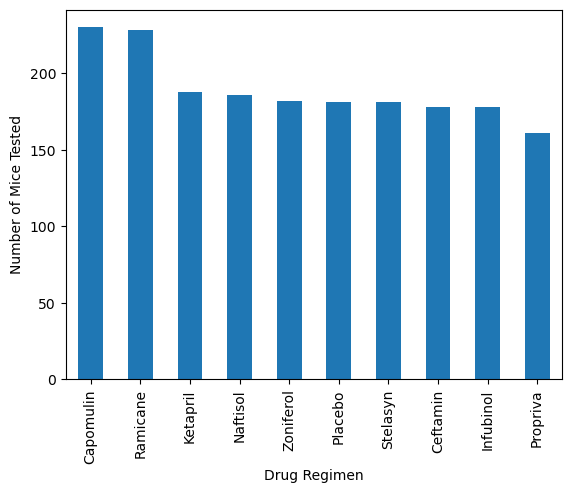

<Figure size 640x480 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

panda = new_dataset_df.groupby("Drug Regimen")
panda_data = (panda["Timepoint"].count()).sort_values(ascending=False)
panda_chart = panda_data.plot(kind="bar")
panda_chart.set_xlabel("Drug Regimen")
panda_chart.set_ylabel("Number of Mice Tested")

plt.show()

plt.tight_layout()

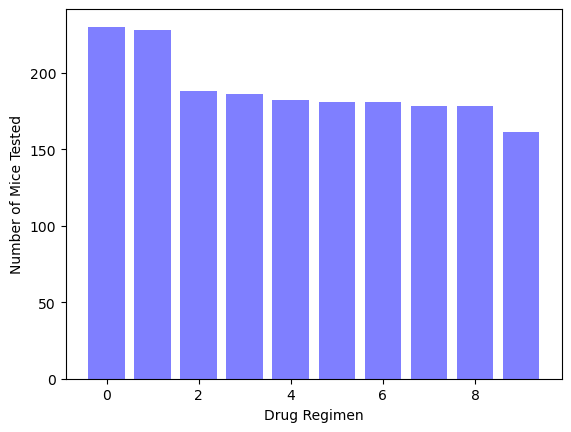

In [34]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Create a Pyplot bar plot based off of the group series from before and label the title

count = new_dataset_df['Drug Regimen'].value_counts()
x_axis = np.arange(len(count))

plt.bar(x_axis, count, color='b', alpha=0.5, align="center")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")


plt.show()

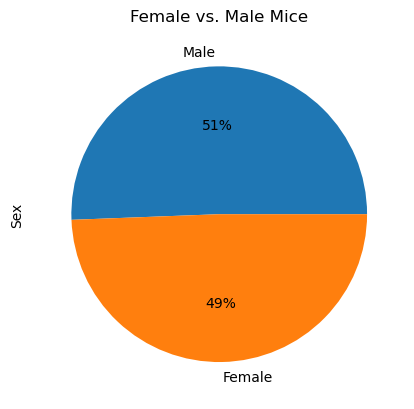

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender = new_dataset_df["Sex"].value_counts()

mice_gender.plot.pie(autopct= "%1.0f%%")
plt.title("Female vs. Male Mice")
plt.show()



([<matplotlib.patches.Wedge at 0x7f9f48038250>,
 [Text(-0.03455180204558471, 1.0994572174374968, 'Male'),
  Text(0.03455180204558458, -1.0994572174374968, 'Female')],
 [Text(-0.01884643747940984, 0.5997039367840891, '51.0%'),
  Text(0.01884643747940977, -0.5997039367840891, '49.0%')])

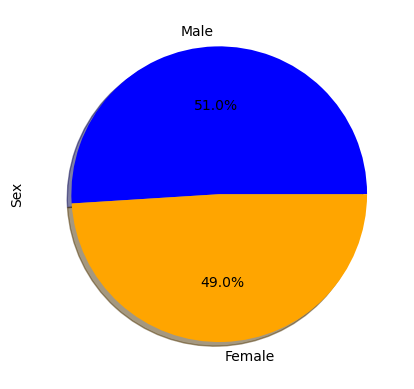

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Male", "Female"]
sizes = [51, 49]
colors = ["blue", "orange"]
plt.ylabel("Sex")
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0)

## Quartiles, Outliers and Boxplots

In [43]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#Created signle dataframes for each of the drugs and then combined into one datafram
capomulin = new_dataset_df.loc[(new_dataset_df['Drug Regimen'] == ("Capomulin"))]
ramicane = new_dataset_df.loc[(new_dataset_df['Drug Regimen'] == ("Ramicane"))]
infubinol = new_dataset_df.loc[(new_dataset_df['Drug Regimen'] == ("Infubinol"))]
ceftamin = new_dataset_df.loc[(new_dataset_df['Drug Regimen'] == ("Ceftamin"))]


four_drugs = pd.concat([capomulin, ramicane, infubinol, ceftamin], axis=0)
four_drugs


# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = four_drugs.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoint_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_timepoint_df = pd.merge(last_timepoint_df, new_dataset_df, how= "left", on=["Mouse ID","Timepoint"])

tumor_timepoint_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [77]:
# Put treatments into a list for for loop (and later for plot labels)
drug_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
capomulin_tumor = []
ramicane_tumor = []
infubinol_tumor = []
ceftamin_tumor = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.   

# Locate the rows which contain mice on each drug and get the tumor volumes     
for index, row in tumor_timepoint_df.iterrows():
    if row["Drug Regimen"] == "Capomulin":
        capomulin_tumor.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"] == treatments[1]:
        ramicane_tumor.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"] == treatments[2]:
        infubinol_tumor.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"] == treatments[3]:
        ceftamin_tumor.append(row["Tumor Volume (mm3)"])
    
    #  add subset 
drug_df = pd.DataFrame({"Capomulin": capomulin_tumor,
                       treatments[1]: ramicane_tumor,
                       treatments[2]: infubinol_tumor,
                       treatments[3]: ceftamin_tumor
                       })
    
# Determine outliers using upper and lower bounds

print(drug_df.describe())
  



       Capomulin   Ramicane  Infubinol   Ceftamin
count  25.000000  25.000000  25.000000  25.000000
mean   36.667568  36.191390  58.178246  57.753977
std     5.715188   5.671539   8.602957   8.365568
min    23.343598  22.050126  36.321346  45.000000
25%    32.377357  31.560470  54.048608  48.722078
50%    38.125164  36.561652  60.165180  59.851956
75%    40.159220  40.659006  65.525743  64.299830
max    47.685963  45.220869  72.226731  68.923185


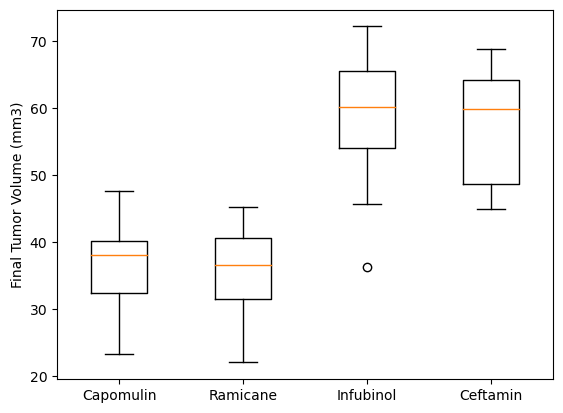

In [92]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(drug_df)
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])

plt.show()


## Line and Scatter Plots

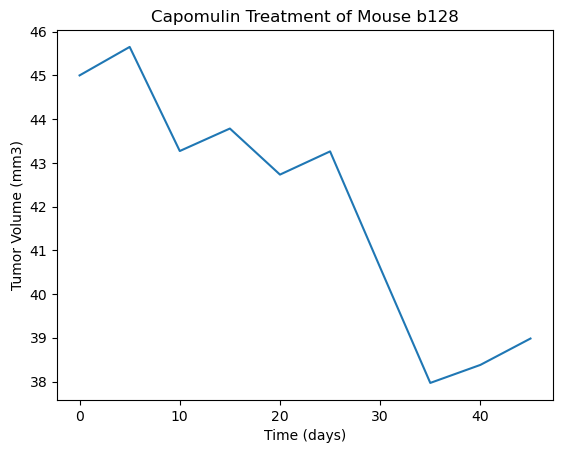

In [105]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

vol_v_time = new_dataset_df.loc[new_dataset_df["Mouse ID"] == "b128"]

plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"])

plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse b128")

plt.show()

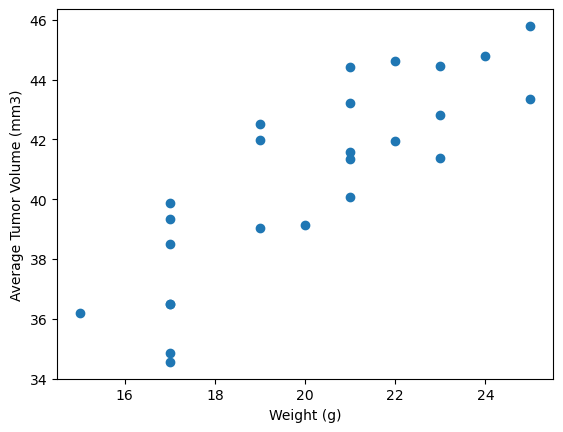

In [115]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Use previously created a dataframe for only Capomulin
capomulin = new_dataset_df.loc[(new_dataset_df["Drug Regimen"] == ("Capomulin"))]

# Calculate the average tumor volume for each mouse in capomulin dataframe
avg_tu_vol_df = pd.DataFrame(capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().sort_values())

# Merge average tumor volume into new_dataset dataframe and drop duplicates
avg_tu_vol_df = pd.merge(capomulin, avg_tu_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[["Weight (g)", "avg_tumor_vol"]].drop_duplicates()
final_avg_vol_df

# Create x and y
x = final_avg_vol_df["Weight (g)"]
y = final_avg_vol_df["avg_tumor_vol"]

# Create a scatter plot based on new dataframe 
plt.scatter(x, y)

# Add labels 
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Display 
plt.show()

## Correlation and Regression

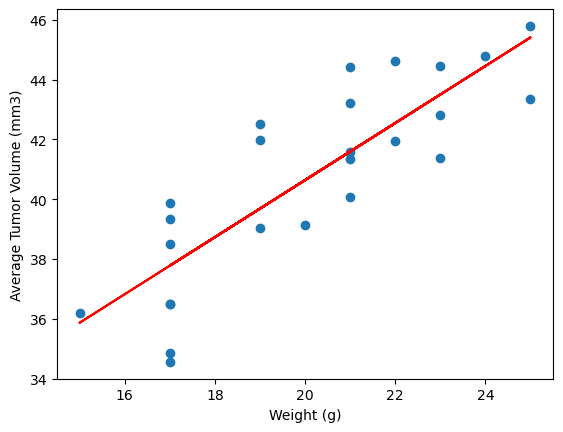

The correlation between mouse weight and the average tumor volume is 0.84


In [125]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#Import lingress
from scipy.stats import linregress


capomulin = new_dataset_df.loc[(new_dataset_df["Drug Regimen"] == ("Capomulin"))]


avg_tu_vol_df = pd.DataFrame(capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().sort_values())


avg_tu_vol_df = pd.merge(capomulin, avg_tu_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[["Weight (g)", "avg_tumor_vol"]].drop_duplicates()
final_avg_vol_df

# Create x and y
x = final_avg_vol_df["Weight (g)"]
y = final_avg_vol_df["avg_tumor_vol"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
 
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()








print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(x,y)[0],2)}")
